<a href="https://colab.research.google.com/github/notsogeekynair/datascwpython/blob/main/Data_Science_with_Python_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Varun Nair
Class: CS 677
Date: 09/20/2024
Homework Problem #1 sub 1
Description : reading csv,adding true label column and converting to dataframe
"""
import pandas as pd
import numpy as np
from google.colab import files
def read_csv_file(file_path):
    try:
        with open(file_path, 'r') as f:
            lines = f.readlines()
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None

    data = []
    for line in lines[1:]:
        columns = line.split(',')
        stock_return = float(columns[13])
        true_label ='+' if stock_return >= 0 else '-'
        data.append({
            'date': columns[0],
            'year': int(columns[1]),
            'month': int(columns[2]),
            'day': int(columns[3]),
            'weekday': columns[4],
            'return': stock_return,
            'true_label': true_label
        })
    return data

uploaded = files.upload()
nvda = read_csv_file('NVDA.csv')
uploaded = files.upload()
spy = read_csv_file('SPY.csv')
nvda_df=pd.DataFrame(nvda)
spy_df=pd.DataFrame(spy)

Saving NVDA.csv to NVDA (1).csv


Saving SPY.csv to SPY (1).csv


In [ ]:
"""
Varun Nair
Class: CS 677
Date: 09/20/2024
Homework Problem #1 sub 2
Description : finding probability of up day
"""

train_nvda = nvda_df[(nvda_df['year']>=2016) & (nvda_df['year']<=2018)]
train_spy = spy_df[(spy_df['year']>=2016) & (spy_df['year']<=2018)]

L_nvda = len(nvda_df[(nvda_df['year']>=2016) & (nvda_df['year']<=2018)])
L_plus_nvda = len(nvda_df[(nvda_df['year']>=2016) & (nvda_df['year']<=2018) & (nvda_df['true_label'] == '+')])
L_minus_nvda = len(nvda_df[(nvda_df['year']>=2016) & (nvda_df['year']<=2018) & (nvda_df['true_label'] == '-')])
L_spy = len(spy_df[(spy_df['year']>=2016) & (spy_df['year']<=2018)])
L_plus_spy = len(spy_df[(spy_df['year']>=2016) & (spy_df['year']<=2018) & (spy_df['true_label'] == '+')])
L_minus_spy = len(spy_df[(spy_df['year']>=2016) & (spy_df['year']<=2018) & (spy_df['true_label'] == '-')])

p_star_nvda = L_plus_nvda/L_nvda
p_star_spy = L_plus_spy/L_spy

print('Probability that the next day is an up day (NVDA) ',p_star_nvda)
print('Probability that the next day is an up day (SPY) ',p_star_spy,'\n')

#Problem #1 sub 3
def sequence_detector(data,seq):
  label_str = ','.join(data['true_label'])
  return label_str.count(seq)

print("For Question 1 sub question 3\n")
#for k=3
countk3_nvda = sequence_detector(train_nvda,'-,-,-,+')
count3_nvda = sequence_detector(train_nvda,'-,-,-,-')
print('Prob for NVDA when k=3 : ',countk3_nvda/(countk3_nvda+count3_nvda))

countk3_spy = sequence_detector(train_spy,'-,-,-,+')
count3_spy = sequence_detector(train_spy,'-,-,-,-')
print('Prob for SPY when k=3 : ',countk3_spy/(countk3_spy+count3_spy))

#for k=2
countk2_nvda = sequence_detector(train_nvda,'-,-,+')
count2_nvda = sequence_detector(train_nvda,'-,-,-')
print('Prob for NVDA when k=2 : ',countk2_nvda/(countk2_nvda+count2_nvda))

countk2_spy = sequence_detector(train_spy,'-,-,+')
count2_spy = sequence_detector(train_spy,'-,-,-')
print('Prob for SPY when k=2 : ',countk2_spy/(countk2_spy+count2_spy))

#for k=1
countk1_nvda = sequence_detector(train_nvda,'-,+')
count1_nvda = sequence_detector(train_nvda,'-,-')
print('Prob for NVDA when k=1 : ',countk1_nvda/(countk1_nvda+count1_nvda))

countk1_spy = sequence_detector(train_spy,'-,+')
count1_spy = sequence_detector(train_spy,'-,-')
print('Prob for SPY when k=1 : ',countk1_spy/(countk1_spy+count1_spy),'\n')


#Problem #1 sub 4
print("For Question 1 subquestion 4\n")

#for l=3
countl3_nvda = sequence_detector(train_nvda,'+,+,+,+')
count3l_nvda = sequence_detector(train_nvda,'+,+,+,-')
print('Prob for NVDA when l=3 : ',countl3_nvda/(countl3_nvda+count3l_nvda))

countl3_spy = sequence_detector(train_spy,'+,+,+,+')
count3l_spy = sequence_detector(train_spy,'+,+,+,-')
print('Prob for SPY when l=3 : ',countl3_spy/(countl3_spy+count3l_spy))

#for l=2
countl2_nvda = sequence_detector(train_nvda,'+,+,+')
count2l_nvda = sequence_detector(train_nvda,'+,+,-')
print('Prob for NVDA when l=2 : ',countl2_nvda/(countl2_nvda+count2l_nvda))

countl2_spy = sequence_detector(train_spy,'+,+,+')
count2l_spy = sequence_detector(train_spy,'+,+,-')
print('Prob for SPY when l=2 : ',countl2_spy/(countl2_spy+count2l_spy))

#for l=1
countl1_nvda = sequence_detector(train_nvda,'+,+')
count1l_nvda = sequence_detector(train_nvda,'+,-')
print('Prob for NVDA when l=1 : ',countl1_nvda/(countl1_nvda+count1l_nvda))

countl1_spy = sequence_detector(train_spy,'+,+')
count1l_spy = sequence_detector(train_spy,'+,-')
print('Prob for SPY when l=1 : ',countl1_spy/(countl1_spy+count1l_spy))




Probability that the next day is an up day (NVDA)  0.5490716180371353
Probability that the next day is an up day (SPY)  0.5543766578249337 

For Question 1 sub question 3

Prob for NVDA when k=3 :  0.75
Prob for SPY when k=3 :  0.7142857142857143
Prob for NVDA when k=2 :  0.6829268292682927
Prob for SPY when k=2 :  0.6923076923076923
Prob for NVDA when k=1 :  0.6666666666666666
Prob for SPY when k=1 :  0.6756756756756757 

For Question 1 subquestion 4

Prob for NVDA when l=3 :  0.38823529411764707
Prob for SPY when l=3 :  0.30952380952380953
Prob for NVDA when l=2 :  0.41139240506329117
Prob for SPY when l=2 :  0.38285714285714284
Prob for NVDA when l=1 :  0.4094955489614243
Prob for SPY when l=1 :  0.41690962099125367


In [ ]:
"""
Varun Nair
Class: CS 677
Date: 09/25/2024
Homework Problem #2
Description : predicting labels
"""
import pandas as pd
import random
training_years ={2016,2017,2018}
testing_years = {2019,2020}


test_nvda = nvda_df[(nvda_df['year']>=2019) & (nvda_df['year']<=2020)]
test_spy = spy_df[(spy_df['year']>=2019) & (spy_df['year']<=2020)]

#Question 2 sub 1
def cts(data):        #converts true label column into string
  label_str = ''.join(data['true_label'])
  return label_str

train_nvda_tl=cts(train_nvda)
train_spy_tl=cts(train_spy)
test_nvda_tl=cts(test_nvda)
test_spy_tl=cts(test_spy)

def predict_labels(train_tl, test_tl, w=3):
  pattern_counts = {}


  for i in range(w, len(train_tl)):
    pattern = train_tl[i-w:i]
    next_label = train_tl[i]
    pattern_key = ''.join(pattern)
    if pattern_key not in pattern_counts:
      pattern_counts[pattern_key] = {'+': 0, '-': 0}
    pattern_counts[pattern_key][next_label] += 1

  # Predict labels for test data
  predicted_labels = []
  for i in range(w, len(test_tl)):
    pattern = test_tl[i-w:i]
    pattern_key = ''.join(pattern)
    if pattern_key in pattern_counts:
      if pattern_counts[pattern_key]['+'] > pattern_counts[pattern_key]['-']:
        predicted_labels.append('+')
      elif pattern_counts[pattern_key]['+'] < pattern_counts[pattern_key]['-']:
        predicted_labels.append('-')
      else:

        predicted_labels.append('+')
    else:
      predicted_labels.append('+')

  return predicted_labels

w_list = [2, 3, 4]
for i in w_list:
  nvda_hat = predict_labels(train_nvda_tl, test_nvda_tl, i)
  spy_hat = predict_labels(train_spy_tl, test_spy_tl, i)
  nvda_hat_str = ''.join(nvda_hat)# Convert predicted labels to strings
  spy_hat_str = ''.join(spy_hat)

  nvda_hat_str = nvda_hat_str[:len(test_nvda_tl)]
  spy_hat_str = spy_hat_str[:len(test_spy_tl)]
  nvda_accuracy = sum(nvda_hat_str[j] == test_nvda_tl[j] for j in range(len(nvda_hat_str))) / len(nvda_hat_str)
  spy_accuracy = sum(spy_hat_str[j] == test_spy_tl[j] for j in range(len(spy_hat_str))) / len(spy_hat_str)

  print(f"W: {i}")
  print("NVDA Accuracy:", nvda_accuracy)
  print("SPY Accuracy:", spy_accuracy)
  print()

W: 2
NVDA Accuracy: 0.8406374501992032
SPY Accuracy: 0.5856573705179283

W: 3
NVDA Accuracy: 0.499001996007984
SPY Accuracy: 0.3932135728542914

W: 4
NVDA Accuracy: 0.556
SPY Accuracy: 0.654



In [ ]:
"""
Varun Nair
Class: CS 677
Date: 09/25/2024
Homework Problem #3
Description : ensemble learning
"""
#Question 3  sub 1
nvda_hat2 = ''.join(predict_labels(train_nvda_tl, test_nvda_tl, 2))
nvda_hat3 = ''.join(predict_labels(train_nvda_tl, test_nvda_tl, 3))
nvda_hat4 = ''.join(predict_labels(train_nvda_tl, test_nvda_tl, 4))

spy_hat2 = ''.join(predict_labels(train_spy_tl, test_spy_tl, 2))
spy_hat3 = ''.join(predict_labels(train_spy_tl, test_spy_tl, 3))
spy_hat4 = ''.join(predict_labels(train_spy_tl, test_spy_tl, 4))

def ensemble_learning(label1,label2,label3):
  ensemble_label = []
  min_len = min(len(label1), len(label2), len(label3))

  for i in range(min_len):
    labels = [label1[i], label2[i], label3[i]]
    plus_count = labels.count('+')
    minus_count = labels.count('-')
    if plus_count > minus_count:
      ensemble_label.append('+')
    else:
      ensemble_label.append('-')

  return ensemble_label

nvda_ensemble = ''.join(ensemble_learning(nvda_hat2,nvda_hat3,nvda_hat4))
print('Ensemble label NVDA : ',nvda_ensemble)
spy_ensemble = ''.join(ensemble_learning(spy_hat2,spy_hat3,spy_hat4))
print('Ensemble label SPY : ',spy_ensemble)
print()
#question3 sub 2

def ensemble_accuracy(ensemble_tl,test_tl):
  correct=0
  total =len(test_tl)
  for i in range(len(ensemble_tl)):
    if ensemble_tl[i]==test_tl[i]:
      correct+=1
  return correct/total

nvda_accuracy2 = ensemble_accuracy(nvda_ensemble,test_nvda_tl)
spy_accuracy2 = ensemble_accuracy(spy_ensemble,test_spy_tl)

print("Ensemble Accuracy for NVDA: ", nvda_accuracy2)
print("Ensemble Accuracy for SPY: ", spy_accuracy2)
print()

#question 3 sub 3

def minus_acc(data_hat,data_tl):
  minus_count=0
  correct_minus_count=0
  total_count = len(data_hat)

  for i in range(total_count):
    if data_tl[i]=='-':
      minus_count+=1
      if data_hat[i]=='-':
        correct_minus_count+=1

  return correct_minus_count/minus_count

nvda_acc_w2 = minus_acc(nvda_hat2,test_nvda_tl)
nvda_acc_w3 = minus_acc(nvda_hat3,test_nvda_tl)
nvda_acc_w4 = minus_acc(nvda_hat4,test_nvda_tl)
nvda_acc_ensemble = minus_acc(nvda_ensemble,test_nvda_tl)

print('NVDA minus accuracy for w2 : ',nvda_acc_w2)
print('NVDA minus accuracy for w3 : ',nvda_acc_w3)
print('NVDA minus accuracy for w4 : ',nvda_acc_w4)
print('NVDA minus accuracy for ensemble : ',nvda_acc_ensemble)
print()
spy_acc_w2 = minus_acc(spy_hat2,test_spy_tl)
spy_acc_w3 = minus_acc(spy_hat3,test_spy_tl)
spy_acc_w4 = minus_acc(spy_hat4,test_spy_tl)
spy_acc_ensemble = minus_acc(spy_ensemble,test_spy_tl)

print('SPY minus accuracy for w2 : ',spy_acc_w2)
print('SPY minus accuracy for w3 : ',spy_acc_w3)
print('SPY minus accuracy for w4 : ',spy_acc_w4)
print('SPY minus accuracy for ensemble : ',spy_acc_ensemble)
print()
#question 3 sub 4
def plus_acc(data_hat,data_tl):
  plus_count=0
  correct_plus_count=0
  total_count = len(data_hat)

  for i in range(total_count):
    if data_tl[i]=='+':
      plus_count+=1
      if data_hat[i]=='+':
        correct_plus_count+=1

  return correct_plus_count/plus_count

nvda_acc_w2_plus = plus_acc(nvda_hat2,test_nvda_tl)
nvda_acc_w3_plus = plus_acc(nvda_hat3,test_nvda_tl)
nvda_acc_w4_plus = plus_acc(nvda_hat4,test_nvda_tl)
nvda_acc_ensemble_plus = plus_acc(nvda_ensemble,test_nvda_tl)
print()
print('NVDA plus accuracy for w2 : ',nvda_acc_w2_plus)
print('NVDA plus accuracy for w3 : ',nvda_acc_w3_plus)
print('NVDA plus accuracy for w4 : ',nvda_acc_w4_plus)
print('NVDA plus accuracy for ensemble : ',nvda_acc_ensemble_plus)
print()
spy_acc_w2_plus = plus_acc(spy_hat2,test_spy_tl)
spy_acc_w3_plus = plus_acc(spy_hat3,test_spy_tl)
spy_acc_w4_plus = plus_acc(spy_hat4,test_spy_tl)
spy_acc_ensemble_plus = plus_acc(spy_ensemble,test_spy_tl)

print('SPY plus accuracy for w2 : ',spy_acc_w2_plus)
print('SPY plus accuracy for w3 : ',spy_acc_w3_plus)
print('SPY plus accuracy for w4 : ',spy_acc_w4_plus)
print('SPY plus accuracy for ensemble : ',spy_acc_ensemble_plus)

Ensemble label NVDA :  +++++++++-+++++++-++++++++++++++++++++-++++-+++++++++++-++++++++++++++-++-++++-++++++-+++-++++-++++++++-+++++++++++++++++++++++-+++++-+++++++++++++-++++-++-++++++++-+++++++++++-+++-++++-++-++++++++++++++-+++++++++-+++++++++++++++++-++++++++++++++-++-++++++++++-++++++-+++++++++++++++++++-++++++++-++-+++++++++++++-++++++++++++-+++++++-+++++++-+++++++++-++++++++++++++++++-+++++++++++-++-+++++++++++++++++-+++++-++++++++++++-++-++++-++++++++++++++-+++++-++-++++++++++++-+++++++++++++++++++-+++++++++++
Ensemble label SPY :  ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
print("Predicted labels for NVDA when W =2 ",nvda_hat2)
print("Predicted labels for NVDA when W =3 : ",nvda_hat3)
print("Predicted labels for NVDA when W =4 : ",nvda_hat4)

print("Predicted labels for SPY when W =2 ",spy_hat2)
print("Predicted labels for SPY when W =3 : ",spy_hat3)
print("Predicted labels for SPY when W =4 : ",spy_hat4)

Predicted labels for NVDA when W =2  +-++-+++++-++-++++-++++++-+-++++-+-++++-++++-++++-+-+-++-+-+++++-++-+++-++-++++-++-+++-+++-+-++-++++++++-+-++++-+-++++-+-++++-++-+++++-++-+++-+-++++-++++-++-++-++-++-++-++-+++++-+++-+-++-++-+++-+++++-+-++-+++-+-+++-+-++-+-+-+-++-+++-+-+++++-++++++-++-++-+++++++-++-+++-+-+-++++-+++-++++++-+-++-+++-++-+-+-+-++-+-++-+-+-+-++-+++-+-++-++-+++++++-+++++-+++-+-+-++-++-++-+-+++-+-+++++++++-++-++-+-++-+++++++++-+++++-+++++-++++++-++-++++-++-++++++-++++-+++++-++-+-+-+-++++++-++-+-++-+-+++-+-+++-++++-+-++++-
Predicted labels for NVDA when W =3 :  -++-+++++-++-++++-++++++-+-++++-+-++++-++++-++++-+-+-++-+-+++++-++-+++-++-++++-++-+++-+++-+-++-++++++++-+-++++-+-++++-+-++++-++-+++++-++-+++-+-++++-++++-++-++-++-++-++-++-+++++-+++-+-++-++-+++-+++++-+-++-+++-+-+++-+-++-+-+-+-++-+++-+-+++++-++++++-++-++-+++++++-++-+++-+-+-++++-+++-++++++-+-++-+++-++-+-+-+-++-+-++-+-+-+-++-+++-+-++-++-+++++++-+++++-+++-+-+-++-++-++-+-+++-+-+++++++++-++-++-+-++-+++++++++-+++++-+++++-++++

In [ ]:

"""
Varun Nair
Class: CS 677
Date: 09/25/2024
Homework Problem #4
Description : calculating for table
"""
#nvda_hat2,3,4
#spy_hat2,3,4
w=[2,3,4]
nvda_tp =[]
spy_tp =[]
#True Positives
def tp(predicted,data_tl):
  tp=sum(predicted[i]==data_tl[i] and predicted[i]=='+' for i in range(len(predicted)))
  return tp
nvda_hat2_tp=tp(nvda_hat2,test_nvda_tl)
nvda_hat3_tp=tp(nvda_hat3,test_nvda_tl)
nvda_hat4_tp=tp(nvda_hat4,test_nvda_tl)
nvda_ensemble_tp=tp(nvda_ensemble,test_nvda_tl)
spy_hat2_tp=tp(spy_hat2,test_spy_tl)
spy_hat3_tp=tp(spy_hat3,test_spy_tl)
spy_hat4_tp=tp(spy_hat4,test_spy_tl)
spy_ensemble_tp=tp(spy_ensemble,test_spy_tl)

#False positives
def fp(predicted,data_tl):
  fp=sum(predicted[i]=='+' and data_tl[i]=='-' for i in range(len(predicted)))
  return fp
nvda_hat2_fp=fp(nvda_hat2,test_nvda_tl)
nvda_hat3_fp=fp(nvda_hat3,test_nvda_tl)
nvda_hat4_fp=fp(nvda_hat4,test_nvda_tl)
nvda_ensemble_fp=fp(nvda_ensemble,test_nvda_tl)
spy_hat2_fp=fp(spy_hat2,test_spy_tl)
spy_hat3_fp=fp(spy_hat3,test_spy_tl)
spy_hat4_fp=fp(spy_hat4,test_spy_tl)
spy_ensemble_fp=fp(spy_ensemble,test_spy_tl)

#True Negatives
def tn(predicted,data_tl):
  tn=sum(predicted[i]==data_tl[i] and predicted[i]=='-' for i in range(len(predicted)))
  return tn
nvda_hat2_tn=tn(nvda_hat2,test_nvda_tl)
nvda_hat3_tn=tn(nvda_hat3,test_nvda_tl)
nvda_hat4_tn=tn(nvda_hat4,test_nvda_tl)
nvda_ensemble_tn=tn(nvda_ensemble,test_nvda_tl)
spy_hat2_tn=tn(spy_hat2,test_spy_tl)
spy_hat3_tn=tn(spy_hat3,test_spy_tl)
spy_hat4_tn=tn(spy_hat4,test_spy_tl)
spy_ensemble_tn=tn(spy_ensemble,test_spy_tl)

#False Negatives
def fn(predicted,data_tl):
  fn=sum(predicted[i]=='-' and data_tl[i]=='+' for i in range(len(predicted)))
  return fn
nvda_hat2_fn=fn(nvda_hat2,test_nvda_tl)
nvda_hat3_fn=fn(nvda_hat3,test_nvda_tl)
nvda_hat4_fn=fn(nvda_hat4,test_nvda_tl)
nvda_ensemble_fn=fn(nvda_ensemble,test_nvda_tl)
spy_hat2_fn=fn(spy_hat2,test_spy_tl)
spy_hat3_fn=fn(spy_hat3,test_spy_tl)
spy_hat4_fn=fn(spy_hat4,test_spy_tl)
spy_ensemble_fn=fn(spy_ensemble,test_spy_tl)

table_data ={
    'W': ['2', '3', '4', 'ensemble', '2', '3', '4', 'ensemble'],
    'Stock': ['SPY', 'SPY', 'SPY', 'SPY', 'NVDA', 'NVDA', 'NVDA', 'NVDA'],
    'TP': [nvda_hat2_tp, nvda_hat3_tp, nvda_hat4_tp, nvda_ensemble_tp, spy_hat2_tp, spy_hat3_tp, spy_hat4_tp, spy_ensemble_tp],
    'FP': [nvda_hat2_fp, nvda_hat3_fp, nvda_hat4_fp, nvda_ensemble_fp, spy_hat2_fp, spy_hat3_fp, spy_hat4_fp, spy_ensemble_fp],
    'TN': [nvda_hat2_tn, nvda_hat3_tn, nvda_hat4_tn, nvda_ensemble_tn, spy_hat2_tn, spy_hat3_tn, spy_hat4_tn, spy_ensemble_tn],
    'FN': [nvda_hat2_fn, nvda_hat3_fn, nvda_hat4_fn, nvda_ensemble_fn, spy_hat2_fn, spy_hat3_fn, spy_hat4_fn, spy_ensemble_fn]
}

table_data=pd.DataFrame(table_data)

#calculating TPR and TNR values and adding it to the dataframe

table_data['TPR'] = (table_data['TP'] / (table_data['TP'] + table_data['FN']))
table_data['TNR'] = (table_data['TN'] / (table_data['TN'] + table_data['FP']))
print(table_data)




          W Stock   TP   FP   TN  FN       TPR       TNR
0         2   SPY  285   80  137   0  1.000000  0.631336
1         3   SPY  199  165   51  86  0.698246  0.236111
2         4   SPY  209  146   69  76  0.733333  0.320930
3  ensemble   SPY  285  165   50   0  1.000000  0.232558
4         2  NVDA  294  208    0   0  1.000000  0.000000
5         3  NVDA  197  208    0  96  0.672355  0.000000
6         4  NVDA  254  135   73  38  0.869863  0.350962
7  ensemble  NVDA  292  208    0   0  1.000000  0.000000


In [ ]:
"""
Varun Nair
Class: CS 677
Date: 09/26/2024
Homework Problem #5
Description : graphs
"""

test_nvda_copy=test_nvda.copy()
test_spy_copy=test_spy.copy()
nvda_hat_best_list = list(nvda_hat2)
nvda_ensemble_list = list(nvda_ensemble)
test_nvda_copy['predicted_best_w'] = None

for i in range(len(nvda_hat_best_list)):
    test_nvda_copy['predicted_best_w'].iloc[i] = nvda_hat_best_list[i]
test_nvda_copy['ensemble label'] = None
for i in range(len(nvda_ensemble)):
    test_nvda_copy['ensemble label'].iloc[i] = nvda_ensemble[i]

spy_hat_best_list = list(spy_hat4)
spy_ensemble_list = list(spy_ensemble)
test_spy_copy['predicted_best_w'] = None
for i in range(len(spy_hat_best_list)):
    test_spy_copy['predicted_best_w'].iloc[i] = spy_hat_best_list[i]
test_spy_copy['ensemble label'] = None
for i in range(len(spy_ensemble)):
    test_spy_copy['ensemble label'].iloc[i] = spy_ensemble[i]

Streaming output truncated to the last 5000 lines.
<ipython-input-15-12469747d415>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_spy_copy['predicted_best_w'].iloc[i] = spy_hat_best_list[i]
<ipython-input-15-12469747d415>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_spy_copy['predicted_best_w'].iloc[i] = spy_hat_best_list[i]
<ipython-input-15-12469747d415>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_spy_cop

<ipython-input-33-b9e8616add6c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted'].iloc[i] = test_df['predicted'].iloc[i-1] * (1 + test_df['return'].iloc[i])
<ipython-input-33-b9e8616add6c>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '102.03745517160834' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test_df['predicted'].iloc[i] = test_df['predicted'].iloc[i-1] * (1 + test_df['return'].iloc[i])
<ipython-input-33-b9e8616add6c>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df

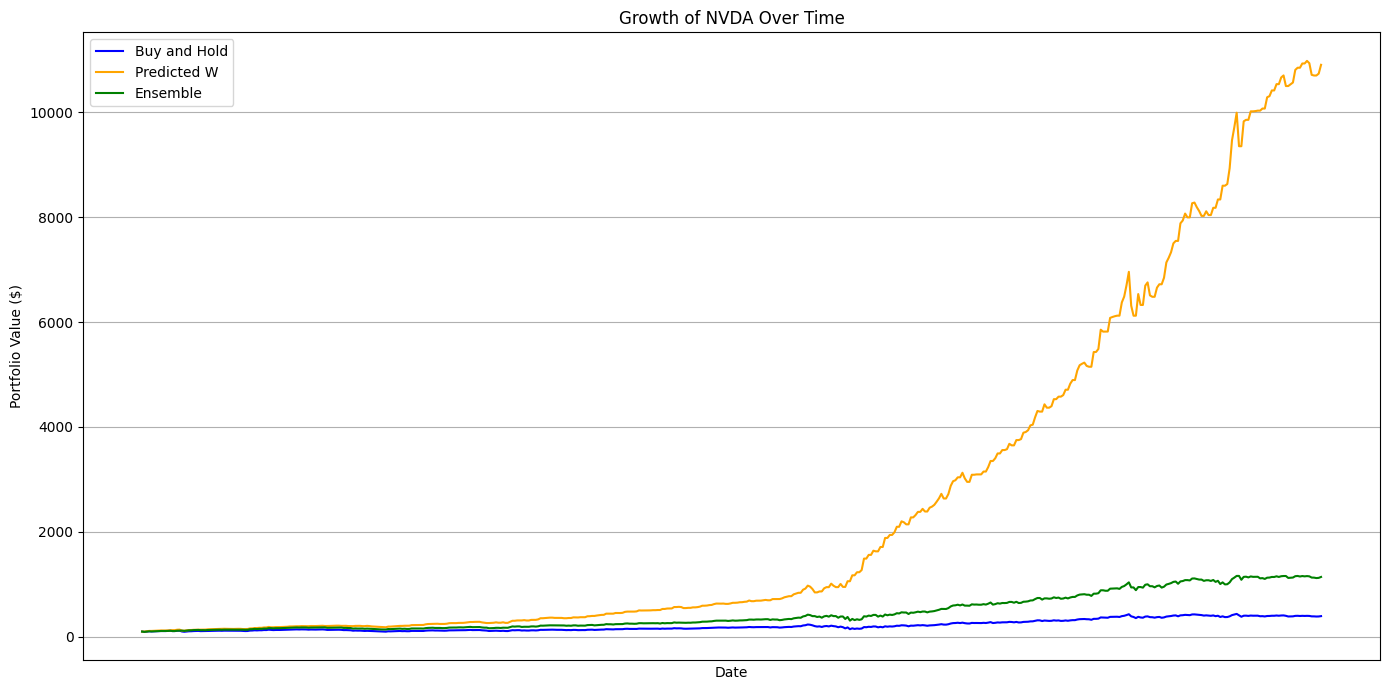

<ipython-input-33-b9e8616add6c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted'].iloc[i] = test_df['predicted'].iloc[i-1] * (1 + test_df['return'].iloc[i])
<ipython-input-33-b9e8616add6c>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '100.10401380894822' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test_df['predicted'].iloc[i] = test_df['predicted'].iloc[i-1] * (1 + test_df['return'].iloc[i])
<ipython-input-33-b9e8616add6c>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df

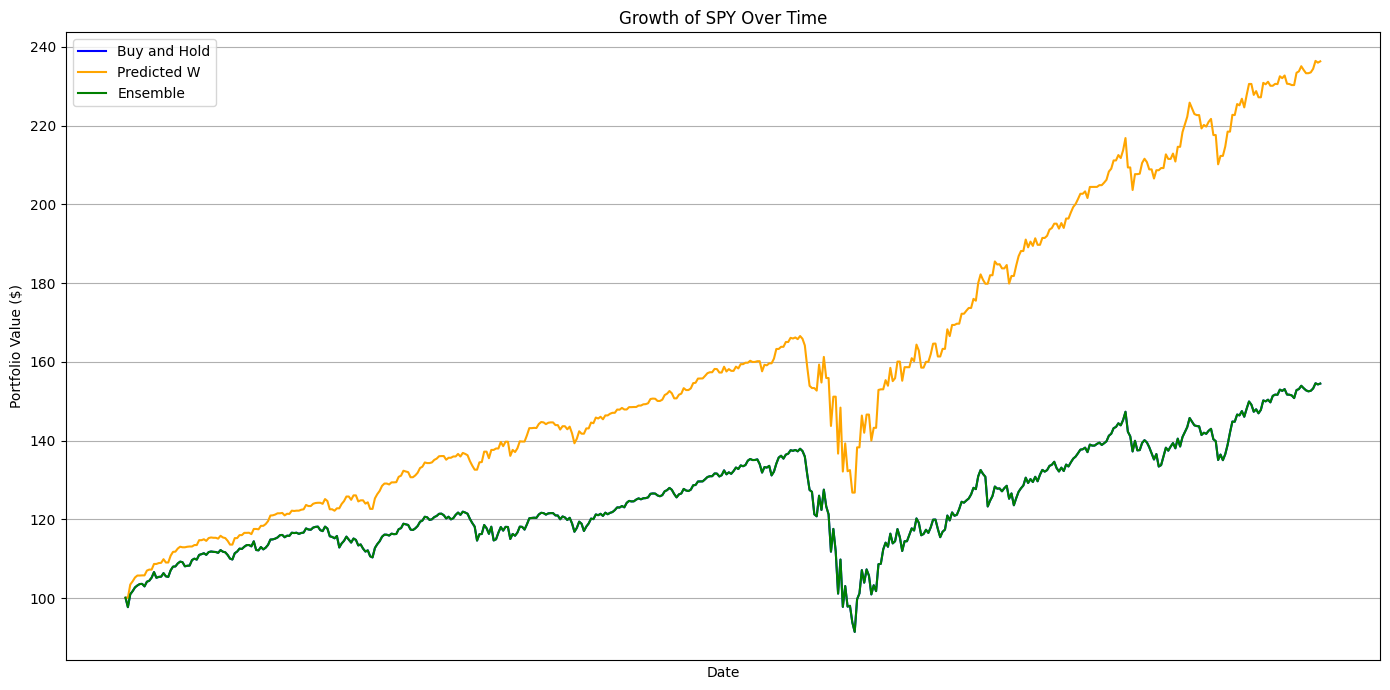

In [ ]:
"""
Varun Nair
Class: CS 677
Date: 09/26/2024
Homework Problem #5
Description : graphs
"""
import pandas as pd
import matplotlib.pyplot as plt

def plot_growth(test_df, stock_name):

    initial_amount = 100
    test_df['buy_and_hold'] = (1 + test_df['return']).cumprod() * initial_amount
    test_df['predicted'] = initial_amount
    test_df['ensemble'] = initial_amount

    for i in range(len(test_df)):

        if test_df['predicted_best_w'].iloc[i] == '+':
            test_df['predicted'].iloc[i] = test_df['predicted'].iloc[i-1] * (1 + test_df['return'].iloc[i])
        elif test_df['predicted_best_w'].iloc[i] == '-':
            test_df['predicted'].iloc[i] = test_df['predicted'].iloc[i-1]
        else:
            test_df['predicted'].iloc[i] = test_df['predicted'].iloc[i-1] * (1 + test_df['return'].iloc[i])
        if test_df['ensemble label'].iloc[i] == '+':
            test_df['ensemble'].iloc[i] = test_df['ensemble'].iloc[i-1] * (1 + test_df['return'].iloc[i])
        elif test_df['ensemble label'].iloc[i] == '-':
            test_df['ensemble'].iloc[i] = test_df['ensemble'].iloc[i-1]
        else:

            test_df['ensemble'].iloc[i] = test_df['ensemble'].iloc[i-1] * (1 + test_df['return'].iloc[i])


    plt.figure(figsize=(14, 7))
    plt.plot(test_df['date'], test_df['buy_and_hold'], label='Buy and Hold', color='blue')
    plt.plot(test_df['date'], test_df['predicted'], label='Predicted W', color='orange')
    plt.plot(test_df['date'], test_df['ensemble'], label='Ensemble', color='green')

    plt.title(f'Growth of {stock_name} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value ($)')
    plt.legend()
    plt.grid()
    plt.xticks([])
    plt.tight_layout()
    plt.show()


plot_growth(test_nvda_copy, 'NVDA')
plot_growth(test_spy_copy, 'SPY')


<ipython-input-41-d0ba92874e23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_spy['cumulative_return'] = (1 + test_spy['return']).cumprod()
<ipython-input-41-d0ba92874e23>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_spy['investment_value'] = initial_investment * test_spy['cumulative_return']


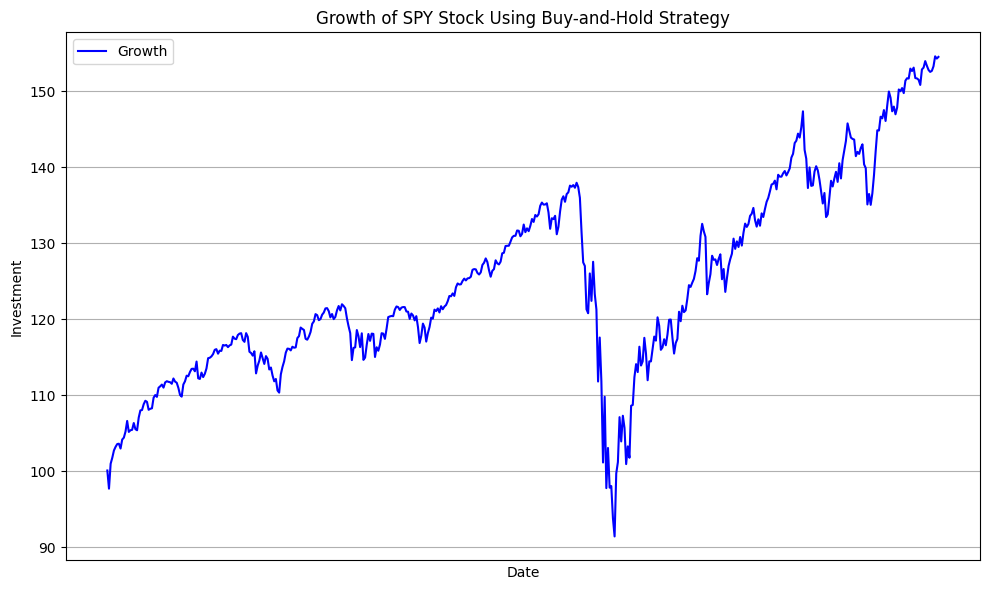

In [ ]:
"""
Varun Nair
Class: CS 677
Date: 09/26/2024
Homework Problem #5
Description : plotting graph for spy using buy and hold strategy
"""
import matplotlib.pyplot as plt

test_spy['cumulative_return'] = (1 + test_spy['return']).cumprod()
initial_investment = 100
test_spy['investment_value'] = initial_investment * test_spy['cumulative_return']
plt.figure(figsize=(10, 6))
plt.plot(test_spy['date'], test_spy['investment_value'], label='Growth', color='blue')
plt.title('Growth of SPY Stock Using Buy-and-Hold Strategy')
plt.xlabel('Date')
plt.ylabel('Investment')
plt.xticks([])
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()